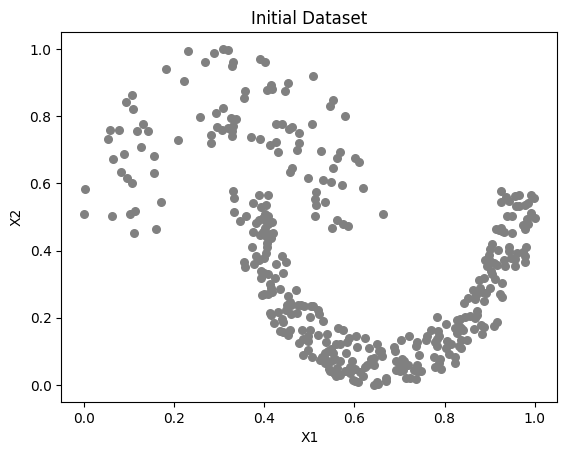

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('dataset.txt')

# Scatter plot of the dataset
plt.scatter(data[:, 0], data[:, 1], s=30, color='grey')
plt.title('Initial Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


In [2]:
# Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Function to initialize centroids by randomly picking K points
def initialize_centroids(data, K):
    centroids = data[np.random.choice(data.shape[0], K, replace=False)]
    return centroids

# Function to assign points to the nearest centroid
def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return clusters


In [3]:
# Function to update centroids by calculating the mean of each cluster
def update_centroids(data, clusters, K):
    new_centroids = np.zeros((K, data.shape[1]))
    for k in range(K):
        points_in_cluster = data[np.array(clusters) == k]
        new_centroids[k] = np.mean(points_in_cluster, axis=0)
    return new_centroids

# Perform K-means clustering with iteration and plotting at each step
def kmeans_clustering(data, K, max_iterations=6):
    centroids = initialize_centroids(data, K)
    for iteration in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, K)

        # Plot each iteration
        plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='rainbow', s=30)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='*')
        plt.title(f"Iteration {iteration + 1}")
        plt.show()

        # Update centroids
        centroids = new_centroids


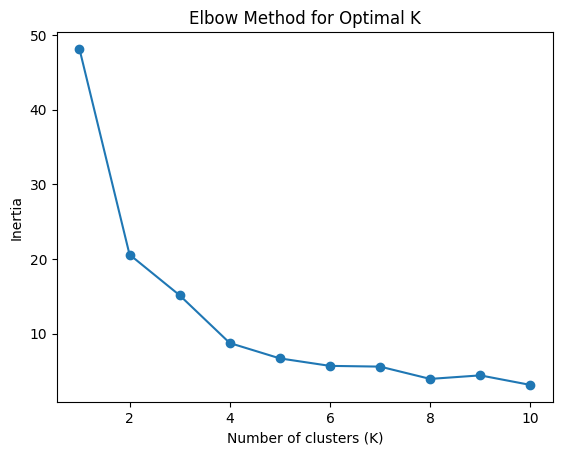

In [4]:
# Function to calculate inertia (sum of squared distances)
def calculate_inertia(data, centroids, clusters):
    inertia = 0
    for i, point in enumerate(data):
        centroid = centroids[clusters[i]]
        inertia += euclidean_distance(point, centroid) ** 2
    return inertia

# Apply Elbow method to find the best K
def elbow_method(data, max_K=10):
    inertia_values = []
    for K in range(1, max_K + 1):
        centroids = initialize_centroids(data, K)
        for iteration in range(6):  # Iterate to ensure convergence
            clusters = assign_clusters(data, centroids)
            centroids = update_centroids(data, clusters, K)
        inertia = calculate_inertia(data, centroids, clusters)
        inertia_values.append(inertia)

    # Plot the Elbow curve
    plt.plot(range(1, max_K + 1), inertia_values, '-o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal K')
    plt.show()

    return inertia_values

# Run the Elbow method
inertia_values = elbow_method(data)


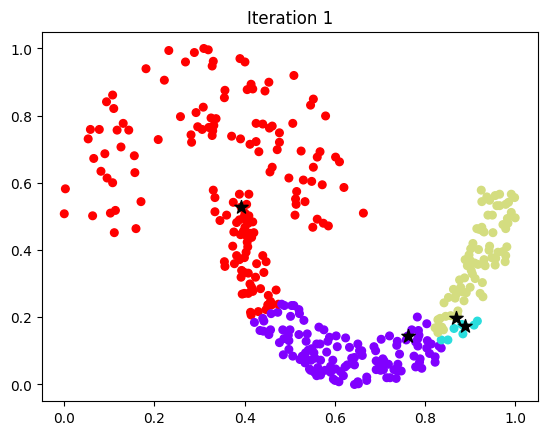

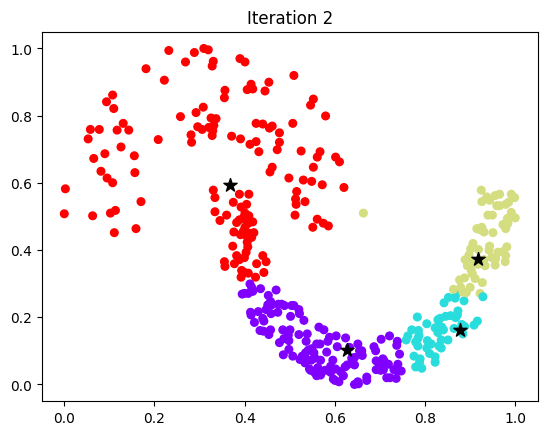

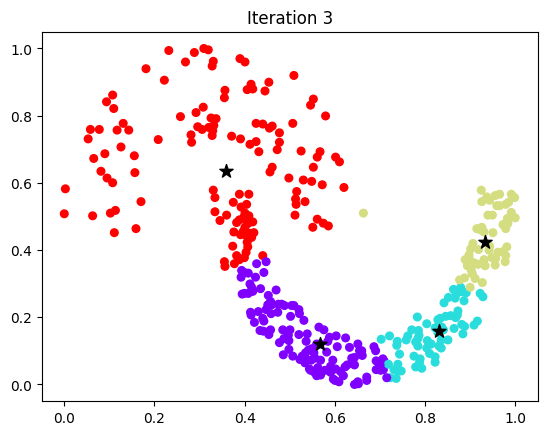

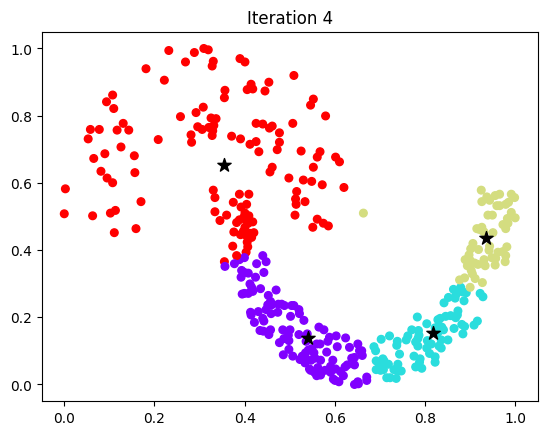

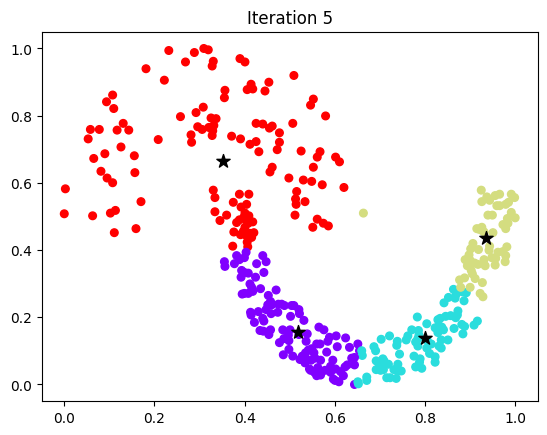

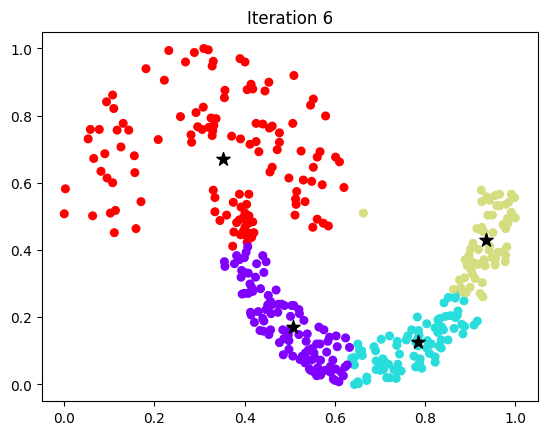

In [5]:
# Assuming optimal K is chosen (manually after inspecting the Elbow plot)
optimal_K = 4  # You may change this based on the Elbow method plot

# Final K-Means clustering with the optimal K
kmeans_clustering(data, optimal_K)
